<h2>Tilastokeskuksen tietokannat</h2>

Tilastokeskuksen tietokannoista voit tallentaa päivittyvän linkin kyselyn tuloksiin.

Seuraavassa käytetään kyselyä osakeasuntojen kuukausittaisista hinnoista, jotka löytyvät osoitteesta http://stat.fi/til/ashi/tau.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Avaan kyselyn
# En ota mukaan kolmea ensimmäistä riviä ja vain tietyt sarakkeet
df = pd.read_excel('http://pxnet2.stat.fi/PXWeb/sq/6ef1c06a-ab7a-4d2f-acee-c4216b99ff1f', 
                   skiprows = 3, usecols = [1, 2, 3, 4])

# Huonosti nimetyn sarakkeen uudelleen nimeäminen
df = df.rename(columns = {'Unnamed: 1' : 'Kuukausi'})

df.head()

,Kuukausi,Koko maa,Pääkaupunkiseutu (PKS),Muu Suomi (koko maa pl. PKS)
0,2015M01,2119.0,3520.0,1605.0
1,2015M02,2140.0,3581.0,1614.0
2,2015M03,2184.0,3689.0,1639.0
3,2015M04,2150.0,3597.0,1622.0
4,2015M05,2155.0,3565.0,1636.0


In [3]:
# Uusimmat tiedot ovat tähdellä merkittyjä ennakkotietoja, jotka voivat vielä tarkentua
df['Kuukausi'].values

array(['2015M01', '2015M02', '2015M03', '2015M04', '2015M05', '2015M06',
       '2015M07', '2015M08', '2015M09', '2015M10', '2015M11', '2015M12',
       '2016M01', '2016M02', '2016M03', '2016M04', '2016M05', '2016M06',
       '2016M07', '2016M08', '2016M09', '2016M10', '2016M11', '2016M12',
       '2017M01', '2017M02', '2017M03', '2017M04', '2017M05', '2017M06',
       '2017M07', '2017M08', '2017M09', '2017M10', '2017M11', '2017M12',
       '2018M01', '2018M02', '2018M03', '2018M04', '2018M05', '2018M06',
       '2018M07', '2018M08', '2018M09', '2018M10', '2018M11', '2018M12',
       '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09', '2019M10', '2019M11', '2019M12',
       '2020M01*', '2020M02*', '2020M03*', '2020M04*', '2020M05*',
       '2020M06*', '2020M07*', '2020M08*', '2020M09*', nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [4]:
# Poistetaan puuttuvia tietoja sisältävä rivit
df = df.dropna(subset = ['Kuukausi'])

# Poistetaan tähdet
df['Kuukausi'] = df['Kuukausi'].astype(str).str.strip('*')

# Lisätään aikaleimat indeksiin
df.index = pd.to_datetime(df['Kuukausi'], format = '%YM%m')

df.tail()

,Kuukausi,Koko maa,Pääkaupunkiseutu (PKS),Muu Suomi (koko maa pl. PKS)
Kuukausi,,,,
2020-05-01,2020M05,2298.0,4200.0,1640.0
2020-06-01,2020M06,2342.0,4228.0,1683.0
2020-07-01,2020M07,2340.0,4157.0,1696.0
2020-08-01,2020M08,2351.0,4284.0,1680.0
2020-09-01,2020M09,2395.0,4280.0,1730.0


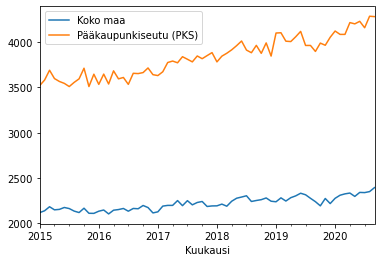

In [5]:
df[['Koko maa', 'Pääkaupunkiseutu (PKS)']].plot()